<a href="https://colab.research.google.com/github/Sreenivas2359/LabSession/blob/main/CSE20016_LabSession_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

B, Sreenivas Prasad         

BL.EN.U4CSE20016

CSE - A

Importing and downloading required python liibraries

In [1]:
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Reading data from the excel sheet


In [2]:
data=pd.read_excel('/content/Lab Session_02 data.xlsx')
data

,Student,Report
0,S1,"So based on the data, the first point what can..."
1,S2,I would suggest to make an application in whic...
2,S3,so what i observed is features in irctc data a...
3,S4,This can be solved with a Regression Machine L...
4,S5,From the stock data provided to build a system...
5,S6,IRCTC Stock Price \nSo what i found is functio...
6,S7,"The loss probability is showing close to 50 , ..."
7,S8,1.In the first problem we were able to find ou...
8,S9,"okay so basically using numpy,we could solve t..."
9,S10,Machine learning enables us to build a system ...


A1. Tokenization,  Tokenize all the documents and store the tokens.

In [3]:
data['Tokens']=data['Report'].apply(nltk.word_tokenize)
for key in range(len(data)):
  data['Tokens'][key]=list(map(lambda x: x.lower(),data['Tokens'][key]))
print(data)

   Student                                             Report  \
0       S1  So based on the data, the first point what can...   
1       S2  I would suggest to make an application in whic...   
2       S3  so what i observed is features in irctc data a...   
3       S4  This can be solved with a Regression Machine L...   
4       S5  From the stock data provided to build a system...   
5       S6  IRCTC Stock Price \nSo what i found is functio...   
6       S7  The loss probability is showing close to 50 , ...   
7       S8  1.In the first problem we were able to find ou...   
8       S9  okay so basically using numpy,we could solve t...   
9      S10  Machine learning enables us to build a system ...   
10     S11  From the stock,I see that almost all the value...   
11     S12  The loss probability is showing close to 50 , ...   
12     S13  After observing the daily trend of change perc...   
13     S14  Machine learning helps us to build a system th...   
14     S15  I have observ

A2. Token Population: Merging the tokens from all documents, create a master list of distinct tokens

In [4]:
merged_token=[]
for key in data['Tokens']:
  merged_token = merged_token + key
token_population=set(merged_token)
print(len(token_population))

505


A3. Stop words :

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

A4. Bag-of-Words :


In [7]:
bag_of_words=list(token_population.difference(stop_words))
print(len(token_population))

505


A5. Document Vectorization :

In [8]:
A1=[]
for m in range(len(data)):
  temp=[]
  for n in bag_of_words:
    if n in data['Tokens'][m]:
      temp.append(1)
    else:
      temp.append(0)
  A1.append(temp)
  print(A1)

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [9]:
A2=[]

for m in range(len(data)):
  x=[0]*(426)
  for n in data['Tokens'][m] :
    if n in bag_of_words:
      x[bag_of_words.index(n)]+=1
  A2.append(x)
  print(A2)


[[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

A6. Similarity Measure :

In [10]:
jaccard=[]
for i in range(len(A1)):
  x=[]
  for j in range(len(A1)):
    union=0
    inter=0
    for k in range(len(A1[i])):
      if (A1[i][k]==A1[j][k]):
        if A1[i][k]==1:
          inter += 1
        else:
          union +=1

    jcc=inter/(union+inter)
    x.append(jcc)
  jaccard.append(x)

print(len(jaccard))



37


A7. Cosine similarity :

In [11]:
from numpy.linalg import norm

cosine=[]
for i in range(len(A2)):
  x=[]
  for j in range(len(A2)):
    cos=np.dot(A2[i],A2[j])/((norm(A2[i]))*(norm(A2[i])))
    x.append(cos)
  cosine.append(x)
print(cosine)

[[1.0, 0.07065217391304347, 0.41304347826086957, 0.05434782608695652, 0.16847826086956522, 0.375, 0.1956521739130435, 0.15217391304347827, 0.391304347826087, 0.14130434782608695, 0.16847826086956522, 0.1956521739130435, 0.09782608695652174, 0.11413043478260869, 0.1956521739130435, 0.11413043478260869, 0.29891304347826086, 0.2717391304347826, 0.14130434782608695, 0.10326086956521739, 0.15760869565217392, 0.010869565217391304, 0.2717391304347826, 0.2717391304347826, 0.16304347826086957, 0.07608695652173914, 0.1956521739130435, 0.44021739130434784, 0.375, 0.22282608695652173, 0.1956521739130435, 0.1358695652173913, 0.125, 0.7282608695652174, 0.1956521739130435, 0.010869565217391304, 0.3967391304347826], [0.5416666666666667, 1.0000000000000002, 0.41666666666666674, 0.08333333333333334, 0.41666666666666674, 0.20833333333333337, 0.20833333333333337, 0.16666666666666669, 0.2916666666666667, 0.37500000000000006, 0.20833333333333337, 0.20833333333333337, 0.20833333333333337, 0.41666666666666674

A8. Plot the Jaccard and cosine matrices and see the results.

* Jaccard matrix plot

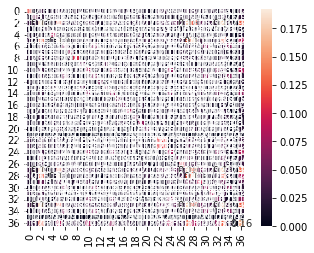

In [12]:
import seaborn as sns
sns.heatmap(jaccard,annot=True,square=True)

* Cosine matrix plot

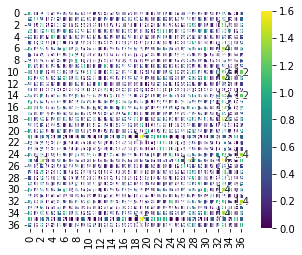

In [13]:
import seaborn as sns
sns.heatmap(cosine, annot = True,square=True,linewidths=1,cmap='viridis')